In [108]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

# Определим распределение Лапласа

   Больше о распределении [Лапласа](https://ru.wikipedia.org/wiki/Распределение_Лапласа)
   
   Среднее Е[x]= β где, -∞<β<+∞ - параметр сдвига.
   
   Дисперсия $E=\frac{2}{\alpha^2}$ - где $\alpha$>0 - параметр масштаба
   
   

In [116]:
a = 1
beta = 0 # теорет. значения
E = beta # мат. ожидание
D = 2/a**2 
print('Мат. ожидание', E)
print('Дисперсия', D)

Мат. ожидание 0
Дисперсия 2.0


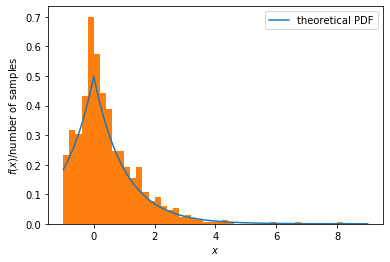

In [117]:
# генирируем выборку объема 1000
laplace = sts.laplace() # т.к a = 2
sampl = laplace.rvs(1000) #создаем случайную выборку из 1000 значений
x = np.linspace(-1, 9, 1000)
pdf = laplace.pdf(x)
#Строим гистограмму 
plt.plot(x, pdf, label='theoretical PDF')
plt.hist(sampl, bins =50, range=(-1,9), density=True)
plt.ylabel('$f(x)$/number of samples')
plt.xlabel('$x$')
plt.legend(loc='best');

## Оценим распределение выборочного среднего случайной величины при разных объёмах выборок

In [129]:
# создадим функцию для проверок различных n 
def another_n(n):
    sampl_n=np.array([]) #обозначим массив выборочных средних
    i=1
    while i <= 1000: # генерация случайных выборок количества n из функции
        sample_i = laplace.rvs(n)#генерация выборки
        mean_i=sum(sample_i)/n #определение выборочного среднего (в.с.)
        sampl_n = np.append(sampl_n,mean_i)#добавляем в массив новое значение в.с.
        i += 1
    #определим параметры нормального распределения описывающие массив 1000 в.с. при n= n
    D5=D/n#дисперсия для нормального распределения приближающего выборку средних
    sigma_n=math.sqrt(D5)#сигма для нормального распределения выборки средних
    norm_n = sts.norm(E, sigma_n)#определяем нормальное распределение с расчетными характеристиками Лапласа
    pdf_n = norm_n.pdf(x[:500])#получаем плотность распределения
    #строим гистограмму массива средних при n=n и плотность описывающую этот массив нормального распределения
    plt.plot(x[:500], pdf_n, label='$PDF(n= %s)$' % n)
    plt.hist(sampl_n, bins =50, range=(-1,4), density=True)
    plt.ylabel('number of samples')
    plt.xlabel('$x$')
    plt.legend(loc='best');
    print('Дисперсия для норм. распр. ', D5)
    print('Сигма для норм. распр. ', sigma_n)

### n = 5

Дисперсия для норм. распр.  0.4
Сигма для норм. распр.  0.6324555320336759


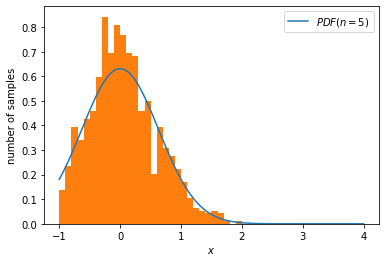

In [130]:
n=5
another_n(n)

### n = 10

Дисперсия для норм. распр.  0.2
Сигма для норм. распр.  0.4472135954999579


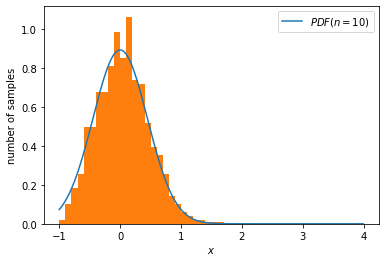

In [131]:
n = 10
another_n(n)

### n = 50

Дисперсия для норм. распр.  0.04
Сигма для норм. распр.  0.2


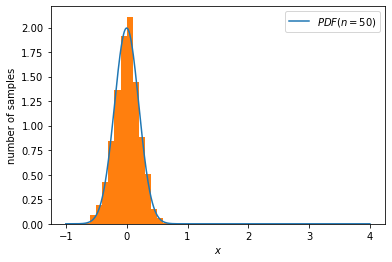

In [132]:
n = 50
another_n(n)

### n = 100

Дисперсия для норм. распр.  0.02
Сигма для норм. распр.  0.1414213562373095


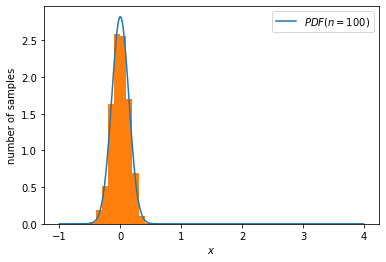

In [133]:
n = 100
another_n(100)

# Вывод

    - Для выполнения задания была выбрана функция распределения Лапласа. Были выполнены условия задачи: построены для четырех разных n (5, 10, 50 и 100) по 1000 случайных выборок, измерены их выборочные средние и составлены соостветствующие массивы, по массивам выборочных средних построены гистограммы распределения, исходя из теоретических данных определены соответствующие каждому n параметры распределений для апроксимации, по полученным параметрам построены функции нормального распределения для каждого n поверх соответствующих гистограмм.
    
    - По полученным графикам наблюдается увелечение точности апроксимации выборочного среднего значения непрерывной случайной величины описываемой распределением Лапласа.